<a href="https://colab.research.google.com/github/Utkarshshah98/Tic-Tac-Toe/blob/main/hate_speech2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


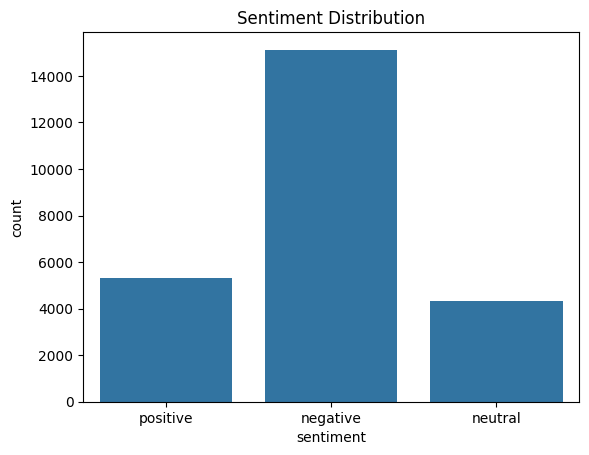

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.93      0.90      3045
     neutral       0.78      0.77      0.77       893
    positive       0.75      0.60      0.67      1019

    accuracy                           0.83      4957
   macro avg       0.80      0.77      0.78      4957
weighted avg       0.83      0.83      0.83      4957

Confusion Matrix:
 [[2828   84  133]
 [ 141  686   66]
 [ 299  109  611]]

Test Tweet:  negative


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('vader_lexicon')

# Step 2: Load Data
df = pd.read_csv("twitter.csv")
print(df.head())

# Assume 'tweet' is the column with text. Adjust if your file has a different name.

# Step 3: Clean Text Function
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_text'] = df['tweet'].apply(clean_text)

# Step 4: Add Sentiment using VADER
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Optional: View sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

# Step 5: Feature Extraction
X = df['clean_text']
y = df['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Predict on New Tweet
def predict_sentiment(tweet):
    tweet_clean = clean_text(tweet)
    tweet_vec = vectorizer.transform([tweet_clean])
    return model.predict(tweet_vec)[0]

print("\nTest Tweet: ", predict_sentiment("i am utkarsh"))
